<a href="https://colab.research.google.com/github/JanetteFu/Message_Detect/blob/main/MH_project_dataset3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
!pip install wordninja
import wordninja
!pip install preprocessor
import preprocessor
!pip install autocorrect
from autocorrect import Speller

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-cp36-none-any.whl size=541552 sha256=0264cbd79d91af88b8428769e5de8e6df5c0b64d636e36bf379a3e4eba3b014a
  Stored in directory: /root/.cache/pip/wheels/22/46/06/9b6d10ed02c85e93c3bb33ac50e2d368b2586248f192a2e22a
Successfully built wordninja
  Created wheel for preprocessor: filename=preprocessor-1.1.3-cp36-none-any.whl size=4478 sha256=772ff15e2b8b82b46ff555095ecd18607433967115c1e174ae37a95f379648c6
  Stored in directory: /root/.cache/pip/wheels/98/c1/a2/21fbcfd80d76576bbf148991a66f00730f541f265c7600000f
Successfully built preprocessor
     |████████████████████████████████| 1.8MB 2.8MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.0.0-cp36-none-any.whl size=1811641 sha256=30d0524508b5b99b5f8a59aa51730314858d8e9e764fd13d7cee71257ed105ae
  Stored in directory: /root/.cache/pip/wheels/0b/06/bc/e66f28d72bed29591eadc79cebb2e7964ad0282804ab233da3
Successfully built autoco

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AlexaDeGrandmont/CardinAI/master/train.csv')
# To display the top 5 rows
df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.label[1]

0

In [ ]:
# Total number of rows and columns
df.shape

(31962, 3)

In [ ]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 3)


In [ ]:
print(df.isnull().sum())

id       0
label    0
tweet    0
dtype: int64


In [ ]:
train1 = df.loc[df['label'] == 1]
train0 = df.loc[df['label'] == 0]

In [ ]:
print('shape on label 0 sentences:')
train0.shape

shape on label 0 sentences:


(29720, 3)

In [ ]:
print('shape on label 1 sentences:')
train1.shape

shape on label 1 sentences:


(2242, 3)

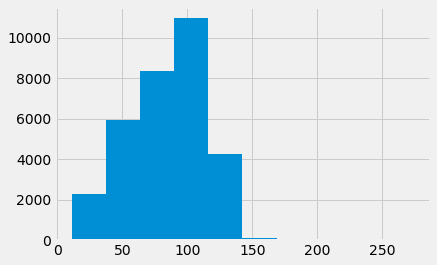

In [ ]:
df['pre_clean_len'] = [len(t) for t in df.tweet]
df.pre_clean_len.hist()

In [ ]:
df[df.pre_clean_len > 140].head(10)

,id,label,tweet,pre_clean_len
7,8,0,the next school year is the year for exams.ð...,143
335,336,0,watching the @user leadership embrace &amp; ki...,146
433,434,0,@user * sweets ð°ð©ð¬ð­ð«â¨!!!!!! ...,145
474,475,0,this is a shockingly and increasingly #viole...,141
565,566,0,thank youðsoo muchð pretty @user i feel ...,142
620,621,0,@user back to @user after a v traumatic few m...,141
773,774,0,ðð»#pretending#to#be #when #you're#in#pai...,151
774,775,0,@user @user @user @user @user evening my de...,147
1100,1101,0,2nite was sad bc i ordered fries @ denny's &am...,141
1142,1143,0,sick verbal irony of the #left: equaling homo...,144


In [ ]:
import re
hashtag = re.compile(r"#(\w+)")

def split_hashtags(tokens):
  new_toks = []
  for token in tokens:
    word = wordninja.split(token)
    new_toks.append(word)
  return new_toks  

hashtag_column = []
for i in range(0,31962):    
    hash = hashtag.findall(df['tweet'][i])                                                          
    hashtag_column.append(hash)

In [ ]:
 hashtag_column[0:5]

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [ ]:
def autocorrect(tokens, skipwords=set()):
  spell = Speller(fast=True)
  skipwords = {'lol', 'xbox'}
  corrected = []
  for token in tokens:
    if not token in skipwords:
      corrected.append(spell(token))
  return corrected

In [ ]:
correct_hashtags = []
for i in range(0,31962):
    if( (i+1)%200 == 0 ):
        print ("Tweets %d has been processed" % ( i+1))                                                                
    correct_hashtags.append(autocorrect(hashtag_column[i]))

Tweets 200 has been processed
Tweets 400 has been processed
Tweets 600 has been processed


KeyboardInterrupt: ignored

In [ ]:
len(correct_hashtags)

738

In [ ]:
correct_hashtags_df = pd.DataFrame(columns=['hashtag'])

In [ ]:
for i in range(len(correct_hashtags)):
    temp = correct_hashtags[i]
    correct_hashtags_df = correct_hashtags_df.append({'hashtag': temp}, ignore_index=True)


In [ ]:
correct_hashtags_df

,hashtag
0,[run]
1,"[left, disappointed, getthanked]"
2,[]
3,[model]
4,[motivation]
...,...
733,[fakenewsale]
734,"[loveherbreakups, hotgoss]"
735,[hateâ]
736,"[sunshine, sunshine]"


In [ ]:
correct_hashtags_df.to_csv('correct_hashtags.csv',encoding='utf-8')

In [ ]:
separated_hashtags = []
for j in range(0,31962):
  temp = []
  for i in range(0,len(correct_hashtags[j])):
    token = correct_hashtags[j][i]
    word = wordninja.split(token)
    temp.append(word)
  separated_hashtags.append(temp)
    

In [ ]:
separated_hashtags[0:5]

[[['run']],
 [['left'], ['disappointed'], ['get', 'thanked']],
 [],
 [['model']],
 [['motivation']],
 [['all', 'show', 'and', 'no', 'go']],
 [],
 [['school'],
  ['exams'],
  ['hate'],
  ['imagine'],
  ['actors', 'life'],
  ['revolution', 'school'],
  ['girl']],
 [['allen'],
  ['caps'],
  ['champions'],
  ['cleveland'],
  ['cleveland', 'cavaliers']],
 [['gr', '8']]]

In [ ]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')


def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)

    letters_only = re.sub("[^#a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only)] #if len(x) > 1]
    
    #words = autocorrect(words)
    return (" ".join(words)).strip()


In [ ]:
clean_tweet_texts = []
for i in range(0,31962):                                                                
    clean_tweet_texts.append(tweet_cleaner(df['tweet'][i]))

In [ ]:
 def split_hashtags(tokens):
  new_toks = []
  for token in tokens:
    if token.startswith('#'):
      splits = wordninja.split(token)
      new_toks.append('#')
      for w in splits:
        new_toks.append(w)
    else:
      new_toks.append(token)
  return new_toks  

if '#' in words:
  if not words.index('#') == len(words) -1:
    indexofhash = words.index('#')
    indextodel = indexofhash + 1
    words[indexofhash] = '#' + words[indextodel]
    del words[indextodel]
words = split_hashtags(words)

In [ ]:
clean_tweet_texts[0:5]

['when a father is dysfunctional and is so selfish he drags his kids into his dysfunction # run',
 'thanks for # lyft credit i can not use cause they do not offer wheelchair vans in pdx # disapointed # getthanked',
 'bihday your majesty',
 '# model i love u take with u all the time in ur',
 'factsguide society now # motivation']

In [ ]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.label
clean_df['hashtag'] = hashtag_column
clean_df.head()

,text,target,hashtag
0,when a father is dysfunctional and is so selfi...,0,[run]
1,thanks for # lyft credit i can not use cause t...,0,"[lyft, disapointed, getthanked]"
2,bihday your majesty,0,[]
3,# model i love u take with u all the time in ur,0,[model]
4,factsguide society now # motivation,0,[motivation]


In [ ]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

In [ ]:
new_df = pd.read_csv('clean_tweet.csv')

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

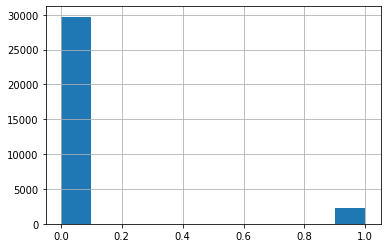

In [ ]:
clean_df['target'].hist()

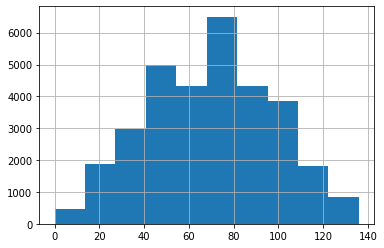

In [ ]:
clean_df['clean_len'] = [len(t) for t in clean_df.text]
clean_df.clean_len.hist()

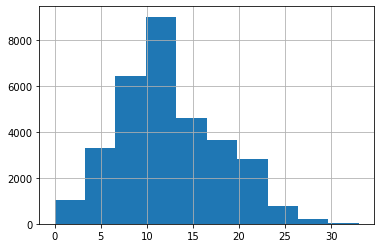

In [ ]:
clean_df['word_length'] = [len(t.split()) for t in clean_df.text]
clean_df.word_length.hist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.utils import shuffle
clean_df_shuffled = shuffle(clean_df)
train_clean_data = clean_df_shuffled[0:28765]
test_clean_data = clean_df_shuffled[28765:]


In [ ]:
train_clean_data .to_csv('train_clean_data.csv',encoding='utf-8')
test_clean_data .to_csv('test_clean_data.csv',encoding='utf-8')

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train_clean_data['text'], 50)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

the 9254
to 8905
you 5426
and 4497
in 4240
for 4065
is 3858
of 3815
my 3365
it 3269
not 3064
love 2515
this 2411
on 2407
with 2281
be 2266
day 2178
that 1851
all 1827
so 1800
are 1767
me 1657
do 1653
your 1556
happy 1539
have 1533
at 1469
we 1417
am 1401
can 1369
will 1260
just 1228
when 1168
what 1078
life 1074
like 1060
time 1036
but 993
today 988
from 957
up 937
now 905
new 899
as 873
out 860
thankful 851
was 847
positive 836
get 825
good 798


<BarContainer object of 50 artists>

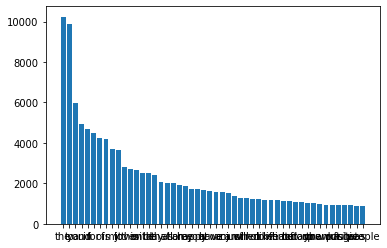

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df1['ReviewText'],df1['count'])

In [ ]:
train_clean_data = pd.read_csv('train_clean_data.csv')

In [ ]:
 target1_train= train_clean_data.loc[clean_df['target'] == 1]
target0_train = train_clean_data.loc[clean_df['target'] == 0]


In [ ]:
target1_train.shape

(2034, 3)

In [ ]:
target1_train.to_csv('target1_train_data.csv',encoding='utf-8')
target0_train.to_csv('target0_train_data.csv',encoding='utf-8')

In [ ]:
common_words1 = get_top_n_words(target1_train['text'], 100)
#for word, freq in common_words1:
#    print(word, freq)
dftarget1 = pd.DataFrame(common_words1, columns = ['ReviewText' , 'count'])

In [ ]:
common_words0 = get_top_n_words(target0_train['text'], 100)
#for word, freq in common_words0:
#    print(word, freq)
dftarget0 = pd.DataFrame(common_words0, columns = ['ReviewText' , 'count'])

In [ ]:
hate_speech_dic = set(dftarget1['ReviewText']).difference(set(dftarget0['ReviewText']))

In [ ]:
non_hate_speech_dic = set(dftarget0['ReviewText']).difference(set(dftarget1['ReviewText']))

In [ ]:
sp_stopwords = set(dftarget0['ReviewText']).intersection(dftarget1['ReviewText'])

In [ ]:
def get_top_n_words_rv(corpus, n=None):
    vec = CountVectorizer(stop_words = sp_stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words0_af = get_top_n_words_rv(target0_train['text'], 100)
for word, freq in common_words0_af:
    print(word, freq)

love 2801
day 2384
happy 1695
am 1560
life 1169
time 1128
today 1081
up 988
now 986
thankful 952
positive 934
get 889
bihday 874
good 841
our 834
one 749
smile 746
see 739
father 650
go 640
want 626
fun 616
take 609
healthy 609
work 605
weekend 604
summer 588
re 537
family 536
there 532
make 532
friday 531
an 528
days 523
beautiful 523
friends 517
got 516
best 513
bull 504
has 497
or 496
way 495
great 490
need 488
here 486
going 477
first 472
us 472
morning 465
music 460


In [ ]:
common_words1_af = get_top_n_words_rv(target1['text'], 50)
for word, freq in common_words1_af:
    print(word, freq)

trump 213
libtard 149
white 140
black 134
racist 108
politics 97
why 96
allahsoil 92
his 85
liberal 82
women 78
might 77
sjw 74
obama 72
has 72
hate 72
because 68
retweet 67
racism 66
re 66
against 64
us 63
or 60
feel 59
listen 57
america 54
an 54
one 49
right 48
stomping 48
race 47
over 47
up 47
men 46
miami 46
being 45
only 45
via 45
should 45
woman 43
her 43
would 40
comments 39
stop 38
won 37
been 37
video 36
there 36
man 35
sex 35


In [ ]:
hate_speech_dic_col = list(hate_speech_dic)
non_hate_speech_dic_col = list(non_hate_speech_dic)
sp_stopwords_col = list(sp_stopwords)
dictionary = pd.DataFrame(list(zip(hate_speech_dic_col, non_hate_speech_dic_col, sp_stopwords_col)), 
               columns =['Hate_Dic', 'Nonhate_dic','Stopwords'])

In [ ]:
dictionary.to_csv('train_dictionary_100.csv',encoding='utf-8')

In [ ]:
dictionary[0:20]

,Hate_Dic,Nonhate_dic,Stopwords
0,blm,best,as
1,miami,need,you
2,men,music,of
3,because,first,to
4,him,fun,do
5,think,am,people
6,america,our,and
7,sjw,smile,it
8,right,got,will
9,over,bull,has
